Author: Joaquin Gonzalez

# Task
Load R2 values from the Google Sheet at 'https://docs.google.com/spreadsheets/d/1gbNxMeWkJ9v7Pn7uJNQcloMJKiv8ide9p1xQWJjEMdA/edit?gid=0#gid=0', parse the 'test_region_metrics' column to extract region names and R2 values, then initialize IBL ONE following the quickstart guide at 'https://int-brain-lab.github.io/ONE/notebooks/one_quickstart.html' to load a brain atlas. Map the extracted R2 values to the corresponding brain atlas regions and generate a 3D colormap visualization of these R2 values on the brain atlas, providing a summary of the observed patterns.

## Load and Parse R2 Values from Google Sheet

### Subtask:
Load the Google Sheet from the provided URL, access the 'test_region_metrics' column, parse this column to extract region names and R2 values, and aggregate the data across rows.


**Reasoning**:
First, I'll import the pandas library to work with DataFrames and construct the Google Sheet URL for direct CSV download.



**Reasoning**:
Now that the CSV URL is constructed, I will load the data directly from this URL into a pandas DataFrame.



In [ ]:
import pandas as pd

# New Google Drive CSV URL provided by the user
google_drive_url = 'https://drive.google.com/file/d/1oVSO6RRzvOEVGHBWhdXx7r9MPlGTDD5t/view'

# Extract the file ID from the Google Drive URL and construct a direct download link
file_id = google_drive_url.split('/')[-2]
csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

print("Pandas library imported.")
print(f"New CSV URL (from Google Drive): {csv_url}")

df = pd.read_csv(csv_url)
print("Data loaded successfully into DataFrame from Google Drive.")
print("First 5 rows of the DataFrame:")
print(df.head())

Pandas library imported.
New CSV URL (from Google Drive): https://drive.google.com/uc?export=download&id=1oVSO6RRzvOEVGHBWhdXx7r9MPlGTDD5t
Data loaded successfully into DataFrame from Google Drive.
First 5 rows of the DataFrame:
                                    pid  n_neurons  \
0  00a96dee-1e8b-44cc-9cc3-aca704d2b594        295   
1  01864e9d-0dbe-41d4-9e3a-0285348ecfc1        109   
2  01937b3b-8719-43c3-b5bd-14e6b0cf2802        228   
3  0228bcfd-632e-49bd-acd4-c334cf9213e9        138   
4  02328ef5-47d4-4690-b020-04b6315aa2d6         96   

                                             regions  train_R2_all  \
0  {"CLI":14,"CS":79,"III":4,"MB":19,"MRN":8,"MY"...       0.73507   
1  {"MRN":7,"PAG":2,"PPN":29,"PRNr":43,"SOCl":1,"...       0.78199   
2  {"CB":15,"GRN":15,"ICB":5,"IP":7,"IRN":73,"MV"...       0.73980   
3   {"COPY":24,"DEC":61,"FOTU":30,"PYR":12,"arb":11}       0.65895   
4   {"ACB":6,"CP":65,"OLF":16,"OT":3,"SI":5,"ccg":1}       0.61242   

   train_R_all  test_R2_a

In [ ]:
import pandas as pd

# New Google Drive CSV URL provided by the user
google_drive_url = 'https://drive.google.com/file/d/1oVSO6RRzvOEVGHBWhdXx7r9MPlGTDD5t/view'

# Extract the file ID from the Google Drive URL and construct a direct download link
file_id = google_drive_url.split('/')[-2]
new_csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'

print(f"New CSV URL (from Google Drive): {new_csv_url}")

# Load the new data into a new DataFrame
new_df = pd.read_csv(new_csv_url)
print("New data loaded successfully into DataFrame 'new_df' from Google Drive.")
print("First 5 rows of the new DataFrame:")
print(new_df.head())

New CSV URL (from Google Drive): https://drive.google.com/uc?export=download&id=1oVSO6RRzvOEVGHBWhdXx7r9MPlGTDD5t
New data loaded successfully into DataFrame 'new_df' from Google Drive.
First 5 rows of the new DataFrame:
                                    pid  n_neurons  \
0  00a96dee-1e8b-44cc-9cc3-aca704d2b594        295   
1  01864e9d-0dbe-41d4-9e3a-0285348ecfc1        109   
2  01937b3b-8719-43c3-b5bd-14e6b0cf2802        228   
3  0228bcfd-632e-49bd-acd4-c334cf9213e9        138   
4  02328ef5-47d4-4690-b020-04b6315aa2d6         96   

                                             regions  train_R2_all  \
0  {"CLI":14,"CS":79,"III":4,"MB":19,"MRN":8,"MY"...       0.73507   
1  {"MRN":7,"PAG":2,"PPN":29,"PRNr":43,"SOCl":1,"...       0.78199   
2  {"CB":15,"GRN":15,"ICB":5,"IP":7,"IRN":73,"MV"...       0.73980   
3   {"COPY":24,"DEC":61,"FOTU":30,"PYR":12,"arb":11}       0.65895   
4   {"ACB":6,"CP":65,"OLF":16,"OT":3,"SI":5,"ccg":1}       0.61242   

   train_R_all  test_R2_all  test

**Reasoning**:
Now that the data is loaded, I need to inspect the 'test_region_metrics' column, which appears to contain string representations of dictionaries. I will use `ast.literal_eval` to safely convert these strings into actual Python dictionaries and then extract the region names and R2 values from each entry.



In [ ]:
import ast

# Initialize a list to store all extracted region data
all_r2_data = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    try:
        # Safely evaluate the string representation of the dictionary
        metrics_dict = ast.literal_eval(row['test_region_metrics'])

        # Iterate through each region and its metrics in the dictionary
        for region, data in metrics_dict.items():
            if 'R2' in data:
                all_r2_data.append({'region': region, 'R2': data['R2']})
    except (ValueError, SyntaxError) as e:
        print(f"Error parsing row {index}: {row['test_region_metrics']} - {e}")

# Convert the list of dictionaries into a DataFrame
r2_df = pd.DataFrame(all_r2_data)

print("Extracted R2 values and regions successfully.")
print("First 5 rows of the R2 DataFrame:")
print(r2_df.head())
print("Summary statistics of R2 values:")
print(r2_df['R2'].describe())


Extracted R2 values and regions successfully.
First 5 rows of the R2 DataFrame:
  region       R2
0    CLI -0.00102
1     CS  0.09187
2    III -0.04684
3     MB -0.17806
4    MRN  0.01580
Summary statistics of R2 values:
count    4.882000e+03
mean    -1.267109e+23
std      8.853458e+24
min     -6.186027e+26
25%     -1.052700e-01
50%     -1.885500e-02
75%      4.039500e-02
max      7.000000e-01
Name: R2, dtype: float64


In [ ]:
r2_df.shape

(4882, 2)

In [ ]:
! pip install ONE-api
! pip install ibllib

In [ ]:
# 5. Plot features on atlas slices

# import ibllib atlas module
from iblatlas.plots import plot_scalar_on_slice
from iblatlas.atlas import AllenAtlas
import numpy as np
ba = AllenAtlas()

# compute colormap levels
#levels = np.nanquantile(fr, [0.1, 0.9])

# plot coronal slice at -2000 um from bregma
#fig, axs = plot_scalar_on_slice(acronyms, fr, coord=-2000, slice='coronal', background='boundary', cmap='Blues', clevels=levels, ba=ba)

# plot sagittal slice at -2000 um from bregma
#fig, axs = plot_scalar_on_slice(acronyms, fr, coord=-2000, slice='sagittal', background='boundary', cmap='Blues', clevels=levels, ba=ba)

# plot horizontl slice at -2000 um from bregma
#fig, axs = plot_scalar_on_slice(acronyms, fr, coord=-2000, slice='horizontal', background='boundary', cmap='Blues', clevels=levels, ba=ba)

In [ ]:
acronyms = r2_df['region'].values
fr = r2_df['R2'].values

print("Extracted acronyms and R2 values successfully.")
print("First 5 acronyms:", acronyms[:5])
print("First 5 R2 values:", fr[:5])

Extracted acronyms and R2 values successfully.
First 5 acronyms: ['CLI' 'CS' 'III' 'MB' 'MRN']
First 5 R2 values: [-0.00102  0.09187 -0.04684 -0.17806  0.0158 ]


In [ ]:
# Group by 'region' and calculate the mean of 'R2' for each region
mean_r2_per_region = r2_df.groupby('region')['R2'].mean().reset_index()

# Extract unique acronyms and their averaged R2 values
acronyms = mean_r2_per_region['region'].values
fr = mean_r2_per_region['R2'].values

print("Averaged R2 values for unique brain regions successfully calculated.")
print("First 5 unique acronyms:", acronyms[:5])
print("First 5 averaged R2 values:", fr[:5])
print("Number of unique regions:", len(acronyms))

Averaged R2 values for unique brain regions successfully calculated.
First 5 unique acronyms: ['AAA' 'ACAd5' 'ACAd6a' 'ACAd6b' 'ACAv1']
First 5 averaged R2 values: [ 0.160785   -0.0445495  -0.65266138 -0.14631    -0.02239   ]
Number of unique regions: 490


In [ ]:
acronyms.shape

(490,)

/usr/local/lib/python3.12/dist-packages/iblatlas/atlas.py:233: RuntimeWarning: invalid value encountered in cast
  ii = np.array(np.round(i)).astype(int)


(<Figure size 640x480 with 2 Axes>,
 <Axes: >,
 <matplotlib.colorbar.Colorbar at 0x7da69c5dba10>)

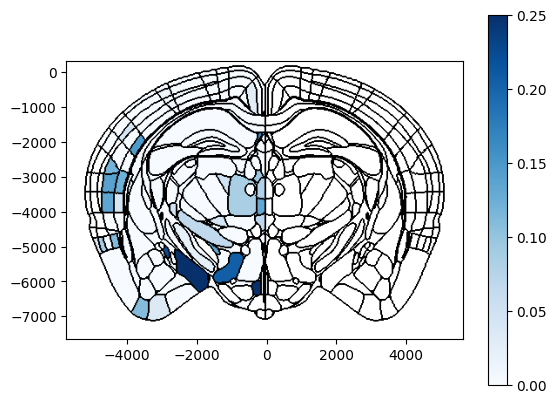

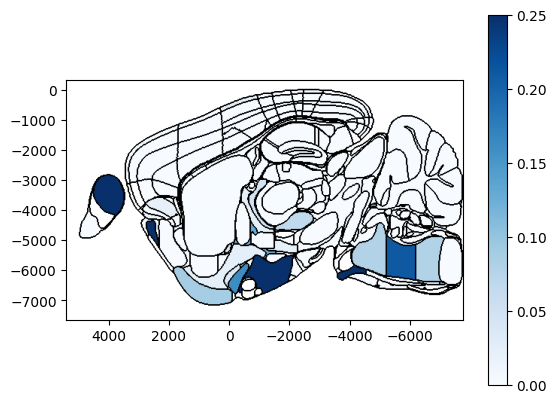

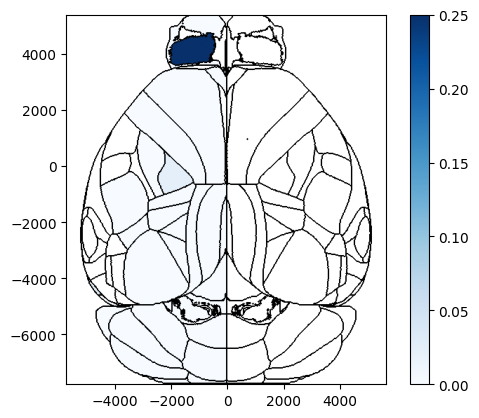

In [ ]:
# compute colormap levels
levels = np.nanquantile(fr, [0.1, 0.9])
levels = [0,0.25]


import matplotlib as mpl
import numpy as np
mpl.rcParams['figure.dpi'] = 100

# Set the global figure DPI for inline display (in the notebook)

# plot coronal slice at -2000 um from bregma
plot_scalar_on_slice(acronyms, fr, coord=-2000, slice='coronal', background='boundary', cmap='Blues', clevels=levels, ba=ba, show_cbar = True)

# plot sagittal slice at -2000 um from bregma
plot_scalar_on_slice(acronyms, fr, coord=-2000, slice='sagittal', background='boundary', cmap='Blues', clevels=levels, ba=ba, show_cbar = True)

# plot horizontl slice at -2000 um from bregma
plot_scalar_on_slice(acronyms, fr, coord=-2000, slice='top', background='boundary', cmap='Blues', clevels=levels, ba=ba, show_cbar = True)

In [ ]:
# Initialize a list to store the converted Swanson acronyms
swanson_acronyms = []
br = BrainRegions()

# Loop through each acronym and convert it to its Swanson equivalent
for acr in acronyms:
    swanson_map = br.acronym2acronym(acr, mapping='Swanson')
    if swanson_map.size > 0:
        # Assuming a single primary mapping; take the first if multiple are returned
        swanson_acronyms.append(swanson_map[0])
    else:
        # If no mapping is found, you might choose to keep the original or mark as 'unknown'
        swanson_acronyms.append(acr) # Keeping original if no Swanson mapping

print(f"Converted {len(acronyms)} acronyms to Swanson mapping.")
print("First 10 original acronyms:", acronyms[:10])
print("First 10 converted Swanson acronyms:", swanson_acronyms[:10])

Converted 490 acronyms to Swanson mapping.
First 10 original acronyms: ['AAA' 'ACAd5' 'ACAd6a' 'ACAd6b' 'ACAv1' 'ACAv2/3' 'ACAv5' 'ACAv6a'
 'ACAv6b' 'ACB']
First 10 converted Swanson acronyms: ['AAA', 'ACAd', 'ACAd', 'ACAd', 'ACAv', 'ACAv', 'ACAv', 'ACAv', 'ACAv', 'ACB']


Successfully created arrays with all individual R2 values and neuron counts.
First 5 R2 values: [-0.00102  0.09187 -0.04684 -0.17806  0.0158 ]
First 5 neuron counts: [14 79  4 19  8]
Total number of R2 values: 4882
Total number of neuron counts: 4882


Text(0.5, 1.0, 'PearsonRResult(statistic=np.float64(-0.015160563192828127), pvalue=np.float64(0.289564249030112))')

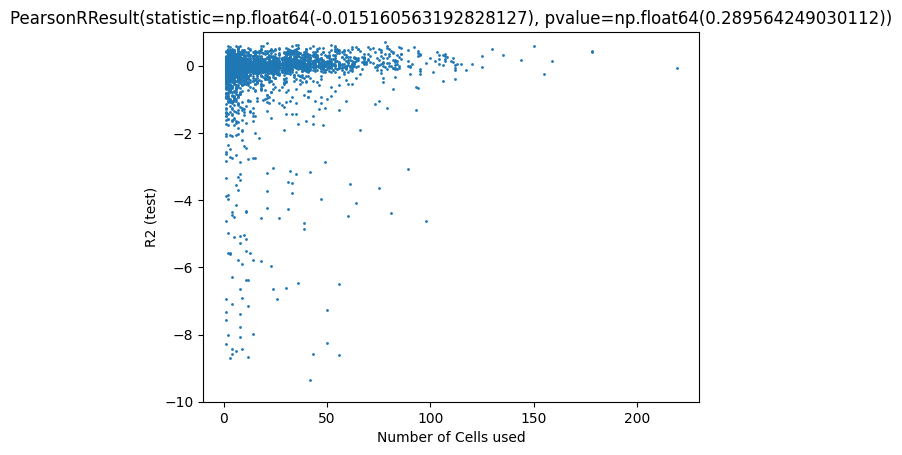

In [ ]:
import ast
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store all individual R2 values and neuron counts
all_test_r2_values = []
all_neuron_values = []

# Iterate through each row of the main DataFrame 'df'
for index, row in df.iterrows():
    try:
        # Parse 'test_region_metrics' column
        metrics_dict = ast.literal_eval(row['test_region_metrics'])
        for region, data in metrics_dict.items():
            if 'R2' in data:
                all_test_r2_values.append(data['R2'])

        # Parse 'regions' column
        regions_dict = ast.literal_eval(row['regions'])
        for region, n_neurons in regions_dict.items():
            all_neuron_values.append(n_neurons)

    except (ValueError, SyntaxError) as e:
        print(f"Error parsing row {index}: {e}")

# Convert the lists to NumPy arrays
all_test_r2_values = np.array(all_test_r2_values)
all_neuron_values = np.array(all_neuron_values)

print("Successfully created arrays with all individual R2 values and neuron counts.")
print("First 5 R2 values:", all_test_r2_values[:5])
print("First 5 neuron counts:", all_neuron_values[:5])
print(f"Total number of R2 values: {len(all_test_r2_values)}")
print(f"Total number of neuron counts: {len(all_neuron_values)}")

# It's important to verify if the lengths match, assuming one neuron count per R2 value entry implicitly.
# If they don't match, it indicates a mismatch in parsing or data structure assumptions.
if len(all_test_r2_values) != len(all_neuron_values):
    print("\nWARNING: The number of extracted R2 values and neuron counts do NOT match.")
    print("This might indicate an issue with the parsing logic or data consistency.")

mpl.rcParams['figure.dpi'] = 100
plt.scatter(all_neuron_values,all_test_r2_values, s = 1)
plt.ylim([-10,1])
plt.ylabel('R2 (test)')
plt.xlabel('Number of Cells used')

from scipy import stats
plt.title(stats.pearsonr(all_neuron_values,all_test_r2_values))



/usr/local/lib/python3.12/dist-packages/iblatlas/regions.py:663: RuntimeWarning: All-NaN slice encountered
  all_values = np.nanmedian(v, axis=0)
(S3) /root/Downloads/ONE/openalyx.internationalbrainlab.org/histology/ATLAS/Needles/Allen/flatmaps/swansonpaths.json: 100%|██████████| 330k/330k [00:00<00:00, 1.38MB/s]


<Axes: >

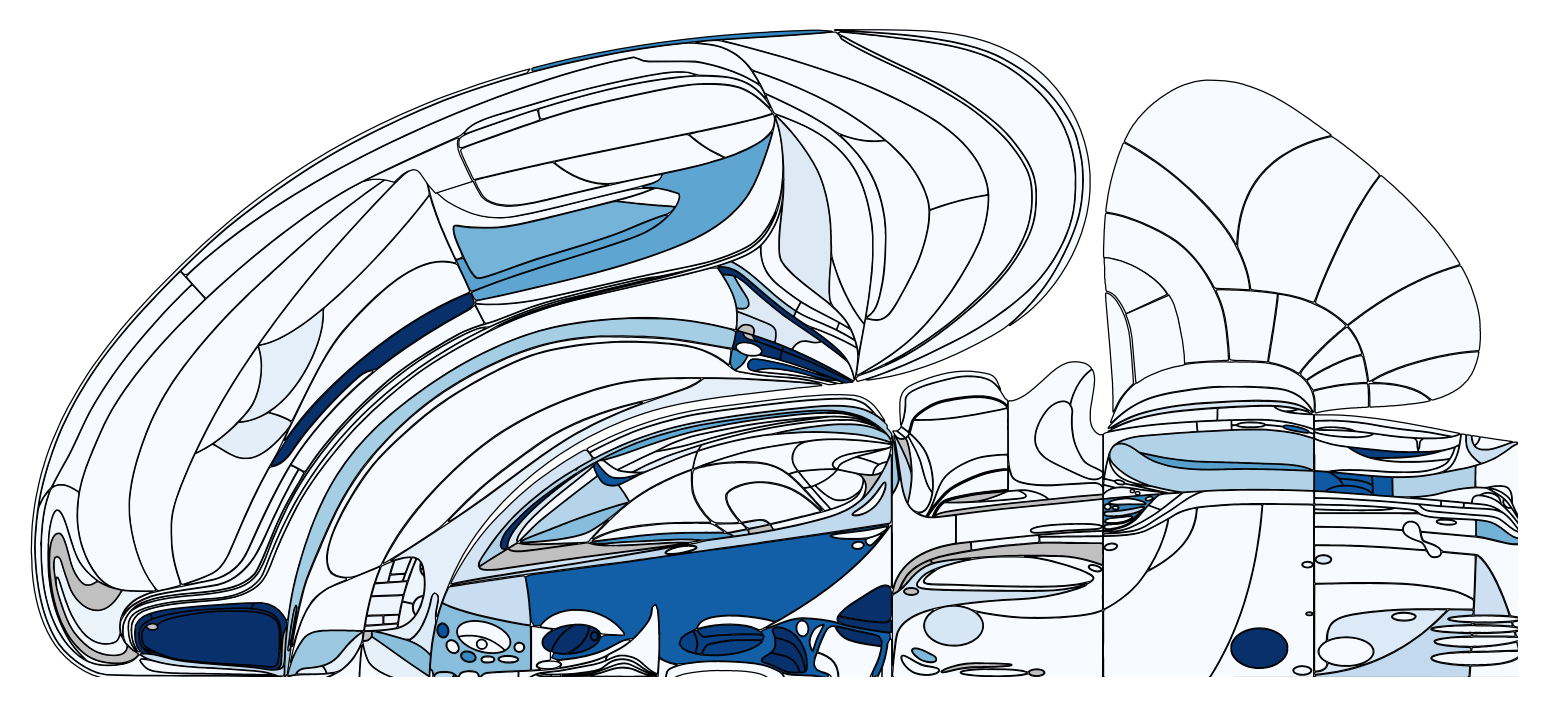

In [ ]:
from iblatlas.plots import plot_swanson_vector
from iblatlas.atlas import BrainRegions
br = BrainRegions()

import matplotlib as mpl
import numpy as np

# Set the global figure DPI for inline display (in the notebook)
mpl.rcParams['figure.dpi'] = 300

# Plot the Swanson vector with adjusted vmin and vmax and a diverging colormap
# Use the filtered arrays for plotting
plot_swanson_vector(swanson_acronyms, fr, cmap='Blues', br=br, vmax=0.25, vmin=0)

Bar plot of positive averaged R2 values per brain region generated successfully.


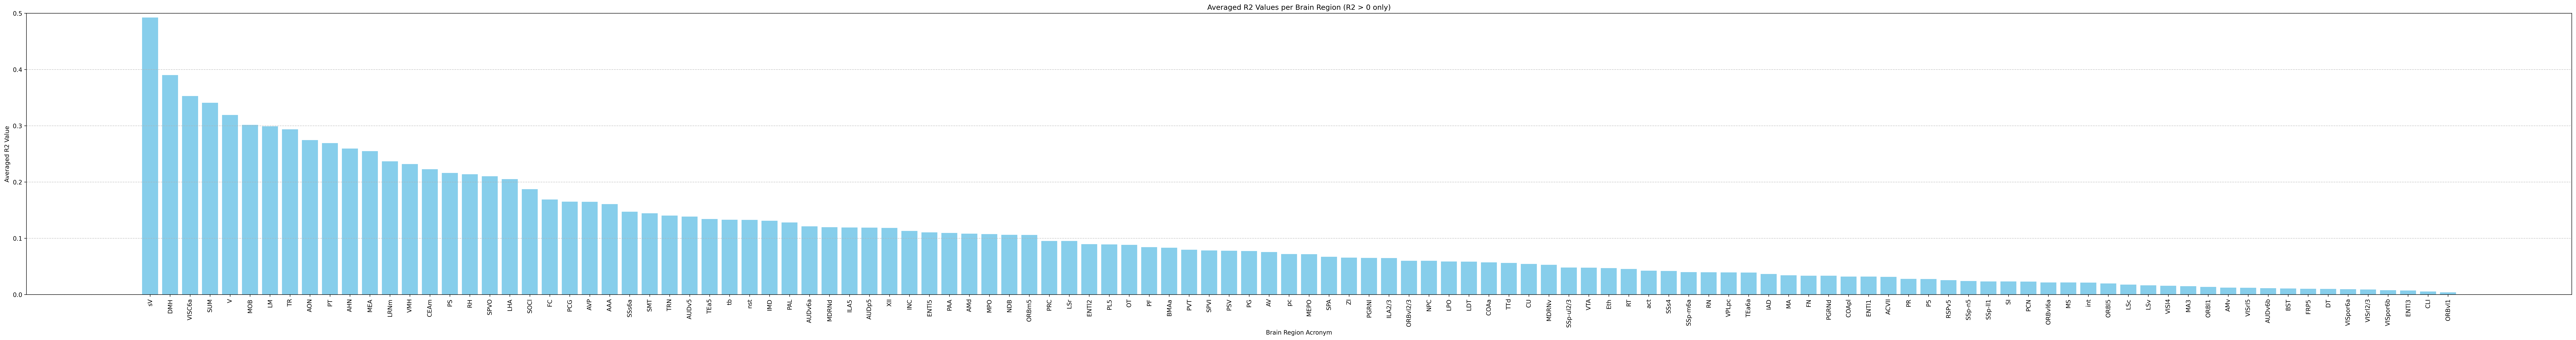

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for values > 0
mask = fr > 0
acronyms_pos = acronyms[mask]
fr_pos = fr[mask]

# Sort the positive values
sorted_indices = fr_pos.argsort()[::-1]
sorted_acronyms = acronyms_pos[sorted_indices]
sorted_fr = fr_pos[sorted_indices]

# Create figure
plt.figure(figsize=(60, 8))
plt.bar(sorted_acronyms, sorted_fr, color='skyblue')

plt.xlabel('Brain Region Acronym')
plt.ylabel('Averaged R2 Value')
plt.title('Averaged R2 Values per Brain Region (R2 > 0 only)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim([0, 0.5])

plt.savefig("brain_regions.pdf", bbox_inches='tight')

print("Bar plot of positive averaged R2 values per brain region generated successfully.")


In [ ]:
import numpy as np
import pandas as pd

# Filter for positive R²
mask = fr > 0
acronyms_pos = acronyms[mask]
fr_pos = fr[mask]

# Sort descending
sorted_idx = fr_pos.argsort()[::-1]
sorted_acronyms = acronyms_pos[sorted_idx]
sorted_fr = fr_pos[sorted_idx]

# 1) List of (region, value) tuples
region_r2_list = list(zip(sorted_acronyms, sorted_fr))

# 2) Dictionary form {region: value}
region_r2_dict = {region: float(val) for region, val in region_r2_list}

# 3) Optional: pandas dataframe
region_r2_df = pd.DataFrame({
    "region": sorted_acronyms,
    "r2": sorted_fr
})

print("List of tuples:")
print(region_r2_list)

print("\nDictionary:")
print(region_r2_dict)

print("\nDataFrame:")
print(region_r2_df)


List of tuples:
[('sV', np.float64(0.4924)), ('DMH', np.float64(0.39011)), ('VISC6a', np.float64(0.35286)), ('SUM', np.float64(0.34081)), ('V', np.float64(0.31921)), ('MOB', np.float64(0.30157)), ('LM', np.float64(0.29902)), ('TR', np.float64(0.29374)), ('AON', np.float64(0.27449833333333334)), ('PT', np.float64(0.26923)), ('AHN', np.float64(0.2594)), ('MEA', np.float64(0.2547388888888889)), ('LRNm', np.float64(0.23669)), ('VMH', np.float64(0.2319)), ('CEAm', np.float64(0.2227125)), ('PS', np.float64(0.21605000000000002)), ('RH', np.float64(0.21375)), ('SPVO', np.float64(0.210235)), ('LHA', np.float64(0.20502727272727272)), ('SOCl', np.float64(0.1871325)), ('FC', np.float64(0.16893)), ('PCG', np.float64(0.16498)), ('AVP', np.float64(0.164775)), ('AAA', np.float64(0.160785)), ('SSs6a', np.float64(0.14711999999999997)), ('SMT', np.float64(0.1444875)), ('TRN', np.float64(0.140222)), ('AUDv5', np.float64(0.13854999999999998)), ('TEa5', np.float64(0.13404333333333332)), ('tb', np.float64(0.

Bar plot of averaged R2 values per brain region sorted by R2 generated successfully.


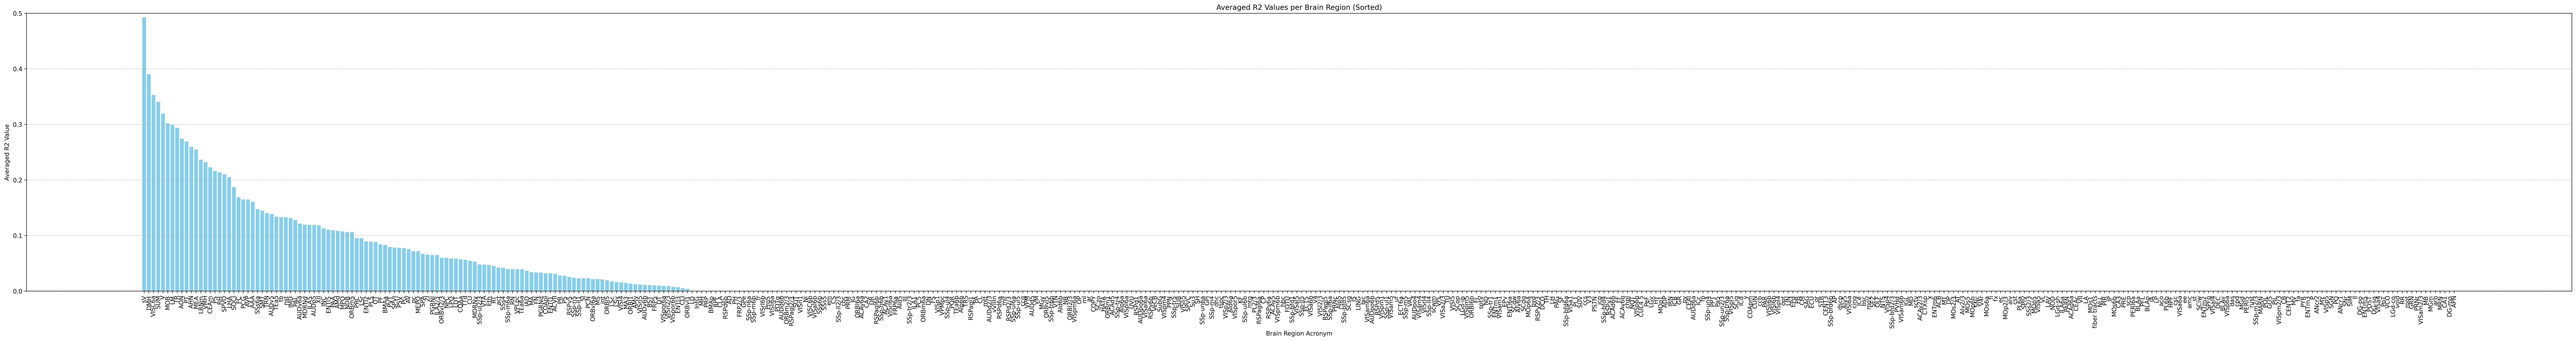

In [ ]:
import matplotlib.pyplot as plt

# Sort the acronyms and fr values based on fr values in descending order
sorted_indices = fr.argsort()[::-1] # Get indices that would sort fr in descending order
sorted_acronyms = acronyms[sorted_indices]
sorted_fr = fr[sorted_indices]

# Create a figure and a set of subplots
plt.figure(figsize=(60, 8)) # Adjust figure size for better readability

# Create the bar plot using sorted data
plt.bar(sorted_acronyms, sorted_fr, color='skyblue')

# Add labels and title
plt.xlabel('Brain Region Acronym')
plt.ylabel('Averaged R2 Value')
plt.title('Averaged R2 Values per Brain Region (Sorted)')

# Rotate x-axis labels for better readability if there are many regions
plt.xticks(rotation=90)

# Add a grid for easier value comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()
plt.ylim([0,0.5])

# Display the plot
plt.savefig("brain_regions.svg", bbox_inches='tight')

print("Bar plot of averaged R2 values per brain region sorted by R2 generated successfully.")

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
plt.figure(figsize=(60, 8)) # Adjust figure size for better readability

# Create the bar plot
plt.bar(acronyms, fr, color='skyblue')

# Add labels and title
plt.xlabel('Brain Region Acronym')
plt.ylabel('Averaged R2 Value')
plt.title('Averaged R2 Values per Brain Region')

# Rotate x-axis labels for better readability if there are many regions
plt.xticks(rotation=90)

# Add a grid for easier value comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()
plt.ylim([0,0.5])

# Display the plot
plt.show()

print("Bar plot of averaged R2 values per brain region generated successfully.")